# Penerapan algoritma branch and bound dan greedy untuk mengelilingi tempat wisata terkenal di Bandung pada liburan akhir semester

Top 9 Tempat wisata di Bandung start dari Kampus
1. Telkom University
2. Trans Studio Bandung (Cibangkong, Batununggal)
3. Dago Dream Park (Mekarwangi, Pagerwangi)
4. Floating Market Lembang (Kabupaten Bandung Barat)
5. Gedung Sate
6. Museum Geologi Bandung (Cihaur Geulis, Kec. Cibeunying Kaler)
7. Bukit Moko
8. Taman Balai Kota Bandung (Kota Bandung)
9. The Great Asia Afrika (Gudangkahuripan, Lembang, Kabupaten Bandung Barat)
10. Jalan Braga (Kota Bandung)

sumber: https://blog.tripcetera.com/id/tempat-wisata-bandung/

Nama kelompok:
1. Khalilullah Al Faath
2. Naufal Abdurrahman Burhani
3. Ariqo Sukma Bahamis 

# Baca file excel matriks jarak antar tempat wisata

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("https://github.com/khalilullahalfaath/SA_Tubes/blob/635eb73abab63587448b08bfe716e7703b5803d3/Jarak%20antar%20tempat%20wisata%20di%20Bandung.xlsx?raw=true")

In [2]:
df

,i/j,1,2,3,4,5,6,7,8,9,10
0,1,0.0,6.2,16.4,21.6,8.3,10.1,18.6,9.7,34.0,9.8
1,2,13.8,0.0,14.1,19.2,7.1,7.8,14.0,8.5,18.9,8.5
2,3,10.2,12.2,0.0,5.5,6.8,6.9,11.4,8.3,8.4,8.8
3,4,9.4,18.4,6.3,0.0,12.9,13.0,17.0,14.1,2.7,14.1
4,5,6.6,4.7,7.0,12.2,0.0,0.2,11.5,2.1,11.8,2.1
5,6,7.6,5.8,7.7,12.9,0.8,0.0,11.2,3.1,12.7,3.1
6,7,17.8,14.0,11.4,16.2,11.6,11.7,0.0,13.9,19.1,14.3
7,8,6.5,4.9,8.1,13.3,1.9,2.8,13.5,0.0,11.6,1.7
8,9,6.3,15.6,9.0,2.7,11.5,11.6,20.1,11.9,0.0,11.9
9,10,7.2,4.0,8.9,14.1,2.7,3.6,14.9,0.8,12.4,0.0


In [3]:
del df["i/j"]
df.index = np.arange(1, len(df) + 1)

In [4]:
df

,1,2,3,4,5,6,7,8,9,10
1,0.0,6.2,16.4,21.6,8.3,10.1,18.6,9.7,34.0,9.8
2,13.8,0.0,14.1,19.2,7.1,7.8,14.0,8.5,18.9,8.5
3,10.2,12.2,0.0,5.5,6.8,6.9,11.4,8.3,8.4,8.8
4,9.4,18.4,6.3,0.0,12.9,13.0,17.0,14.1,2.7,14.1
5,6.6,4.7,7.0,12.2,0.0,0.2,11.5,2.1,11.8,2.1
6,7.6,5.8,7.7,12.9,0.8,0.0,11.2,3.1,12.7,3.1
7,17.8,14.0,11.4,16.2,11.6,11.7,0.0,13.9,19.1,14.3
8,6.5,4.9,8.1,13.3,1.9,2.8,13.5,0.0,11.6,1.7
9,6.3,15.6,9.0,2.7,11.5,11.6,20.1,11.9,0.0,11.9
10,7.2,4.0,8.9,14.1,2.7,3.6,14.9,0.8,12.4,0.0


In [13]:
def changeName(rute):
    arrNama = ["Telkom University","Trans Studio Bandung","Dago Dream Park","Floating Market Lembang","Gedung Sate","Museum Geologi Bandung","Bukit Moko", "Taman Balai Kota Bandung", "The Great Asia Afrika","Jalan Braga"]
    for i in range(N):
        if (i < N-1):
            print(arrNama[rute[i]], end = ' -> ')
        else:
            print(arrNama[rute[i+1]], end="\n\n")


In [14]:
import math
maxsize = float('inf')
  
# Function to copy temporary solution
# to the final solution
def copyToFinal(curr_path):
    final_path[:N + 1] = curr_path[:]
    final_path[N] = curr_path[0]
  
# Function to find the minimum edge cost 
# having an end at the vertex i
def firstMin(adj, i):
    min = maxsize
    for k in range(N):
        if adj[i][k] < min and i != k:
            min = adj[i][k]
  
    return min
  
# function to find the second minimum edge 
# cost having an end at the vertex i
def secondMin(adj, i):
    first, second = maxsize, maxsize
    for j in range(N):
        if i == j:
            continue
        if adj[i][j] <= first:
            second = first
            first = adj[i][j]
  
        elif(adj[i][j] <= second and 
             adj[i][j] != first):
            second = adj[i][j]
  
    return second
  
# function that takes as arguments:
# curr_bound -> lower bound of the root node
# curr_weight-> stores the weight of the path so far
# level-> current level while moving
# in the search space tree
# curr_path[] -> where the solution is being stored
# which would later be copied to final_path[]
def TSPRec(adj, curr_bound, curr_weight, 
              level, curr_path, visited):
    global final_res
      
    # base case is when we have reached level N 
    # which means we have covered all the nodes once
    if level == N:
          
        # check if there is an edge from
        # last vertex in path back to the first vertex
        if adj[curr_path[level - 1]][curr_path[0]] != 0:
              
            # curr_res has the total weight
            # of the solution we got
            curr_res = curr_weight + adj[curr_path[level - 1]]\
                                        [curr_path[0]]
            if curr_res < final_res:
                copyToFinal(curr_path)
                final_res = curr_res
        return
  
    # for any other level iterate for all vertices
    # to build the search space tree recursively
    for i in range(N):
          
        # Consider next vertex if it is not same 
        # (diagonal entry in adjacency matrix and 
        #  not visited already)
        if (adj[curr_path[level-1]][i] != 0 and
                            visited[i] == False):
            temp = curr_bound
            curr_weight += adj[curr_path[level - 1]][i]
  
            # different computation of curr_bound 
            # for level 2 from the other levels
            if level == 1:
                curr_bound -= ((firstMin(adj, curr_path[level - 1]) + 
                                firstMin(adj, i)) / 2)
            else:
                curr_bound -= ((secondMin(adj, curr_path[level - 1]) +
                                 firstMin(adj, i)) / 2)
  
            # curr_bound + curr_weight is the actual lower bound 
            # for the node that we have arrived on.
            # If current lower bound < final_res, 
            # we need to explore the node further
            if curr_bound + curr_weight < final_res:
                curr_path[level] = i
                visited[i] = True
                  
                # call TSPRec for the next level
                TSPRec(adj, curr_bound, curr_weight, 
                       level + 1, curr_path, visited)
  
            # Else we have to prune the node by resetting 
            # all changes to curr_weight and curr_bound
            curr_weight -= adj[curr_path[level - 1]][i]
            curr_bound = temp
  
            # Also reset the visited array
            visited = [False] * len(visited)
            for j in range(level):
                if curr_path[j] != -1:
                    visited[curr_path[j]] = True
  
# This function sets up final_path
def TSP(adj):
      
    # Calculate initial lower bound for the root node 
    # using the formula 1/2 * (sum of first min + 
    # second min) for all edges. Also initialize the 
    # curr_path and visited array
    curr_bound = 0
    curr_path = [-1] * (N + 1)
    visited = [False] * N
  
    # Compute initial bound
    for i in range(N):
        curr_bound += (firstMin(adj, i) + 
                       secondMin(adj, i))
  
    # Rounding off the lower bound to an integer
    curr_bound = math.ceil(curr_bound / 2)
  
    # We start at vertex 1 so the first vertex 
    # in curr_path[] is 0
    visited[0] = True
    curr_path[0] = 0
  
    # Call to TSPRec for curr_weight 
    # equal to 0 and level 1
    TSPRec(adj, curr_bound, 0, 1, curr_path, visited)
  
# Driver code
  
# Adjacency matrix for the given graph
adj = np.array(df)
N = 10
  
# final_path[] stores the final solution 
# i.e. the // path of the salesman.
final_path = [None] * (N + 1)
  
# visited[] keeps track of the already
# visited nodes in a particular path
visited = [False] * N
  
# Stores the final minimum weight
# of shortest tour.
final_res = maxsize
  
TSP(adj)

print("Implementasi Branch and Bound")
print("---------------------------")
print("Minimum cost :", final_res)
print("Path Taken : ", end = ' ')
for i in range(N + 1):
    if (i < N):
        print(final_path[i]+1, end = ' -> ')
    else:
        print(final_path[i]+1, end="\n\n")
changeName(final_path)


Implementasi Branch and Bound
---------------------------
Minimum cost : 56.1
Path Taken :  1 -> 2 -> 5 -> 10 -> 8 -> 6 -> 7 -> 3 -> 4 -> 9 -> 1

Telkom University -> Trans Studio Bandung -> Gedung Sate -> Jalan Braga -> Taman Balai Kota Bandung -> Museum Geologi Bandung -> Bukit Moko -> Dago Dream Park -> Floating Market Lembang -> Telkom University



In [ ]:
print(maxsize)

inf


# Greedy

In [15]:
def findMinRoute(tsp):
    sum = 0
    counter = 0
    i = 0
    j = 0
    mn = 999999999
    visitedRouteList = {}
    visitedRouteList[0] = 1
    route = [0] *len(tsp)
    while i < len(tsp) and j < len(tsp[i]):
        if counter >= len(tsp[i]) - 1:
            break
        if j != i and j not in visitedRouteList:
            if tsp[i][j] < mn:
                mn = tsp[i][j]
                route[counter] = j + 1
        j += 1
        if j == len(tsp[i]):
            sum += mn 
            mn = 999999999 
            visitedRouteList[route[counter] - 1] = 1 
            j = 0 
            i = route[counter] - 1 
            counter += 1
        #routes += [np.where(tsp == mn)]
    i = route[counter - 1] - 1 
    for  j in range(0, len(tsp)):
        if i != j and tsp[i][j] < mn:
            mn = tsp[i][j]
        
    sum += mn 
    print("Implementasi Greedy")
    print("---------------------------")
    print("Minimum route: ",sum)
    rute = []
    for key,value in visitedRouteList.items():
        rute += [key]
    rute.append(0)
    N = 10
    print("Path Taken : ", end = ' ')
    for i in range(N + 1):
        if (i < N):
            print(rute[i]+1, end = ' -> ')
        else:
            print(rute[i]+1, end = "\n\n")
    changeName(rute)
    
tsp =  np.array(df)
findMinRoute(tsp)

Implementasi Greedy
---------------------------
Minimum route:  66.9
Path Taken :  1 -> 2 -> 5 -> 6 -> 8 -> 10 -> 3 -> 4 -> 9 -> 7 -> 1

Telkom University -> Trans Studio Bandung -> Gedung Sate -> Museum Geologi Bandung -> Taman Balai Kota Bandung -> Jalan Braga -> Dago Dream Park -> Floating Market Lembang -> The Great Asia Afrika -> Telkom University



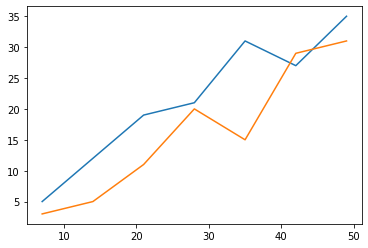

In [16]:
import matplotlib.pyplot as plt

# Define data values
x = [7, 14, 21, 28, 35, 42, 49]
y = [5, 12, 19, 21, 31, 27, 35]
z = [3, 5, 11, 20, 15, 29, 31]

# Plot a simple line chart
plt.plot(x, y)

# Plot another line on the same chart/graph
plt.plot(x, z)

plt.show()


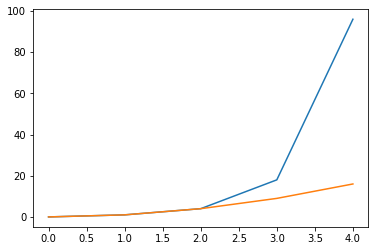

[0, 1, 4, 18, 96]
[0, 1, 4, 9, 16]


In [23]:
import math
def timeComplexity(n):
    yBnB = []
    yGreedy = []
    x = []
    for i in range(n):
        x.append(i)
        yBnB.append(i*math.factorial(i))
        yGreedy.append(i**2)
    plt.plot(x, yBnB)
    plt.plot(x, yGreedy)
    plt.show()
    print(yBnB)
    print(yGreedy)

timeComplexity(5)